In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Read the JSON file
models = ['davinci']
for model in models:
    with open(f'results/CC_results_{model}.json', 'r') as file:
        data = json.load(file)

    # Modify the JSON object
    modified_data = {
        "summary": data,
        "per_question_results": []
    }

    # Write the modified JSON object back to the same file
    with open(f'results/CC_results_{model}.json', 'w') as file:
        json.dump(modified_data, file, indent=4)



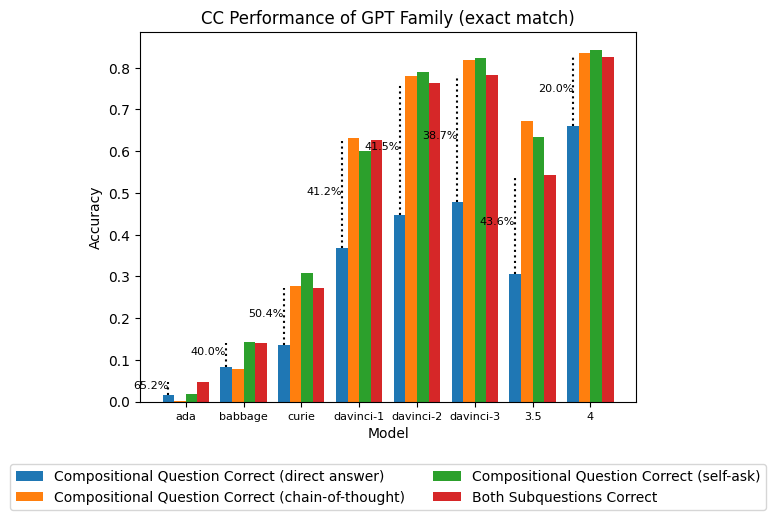

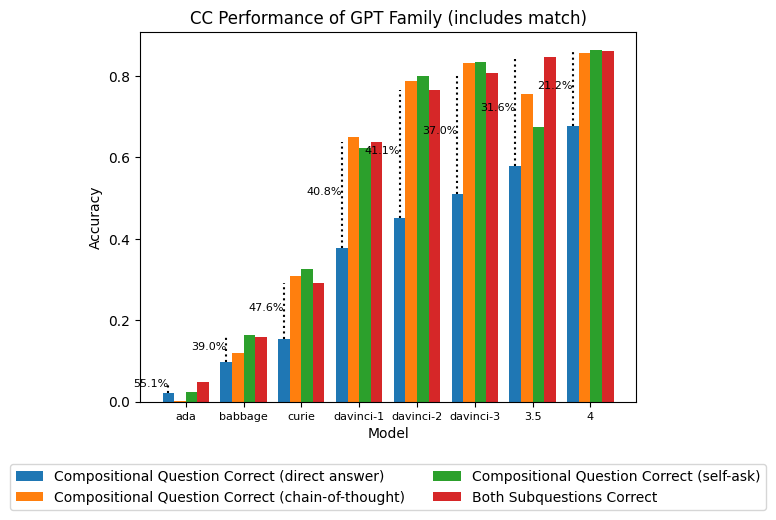

In [34]:
# GPT-3 family
# models = ['ada', 'babbage', 'curie', 'davinci', 'gpt-3.5-turbo_default_sysprompt', "gpt-4"]


# InstructGPT-3 family
models = ['text-ada-001', 'text-babbage-001', 'text-curie-001', 'text-davinci-001', 'text-davinci-002', 'text-davinci-003', 'gpt-3.5-turbo_default_sysprompt', "gpt-4"]


models_to_short_names = {
    'ada': 'ada', 
    'babbage': 'babbage', 
    'curie': 'curie',
    'text-ada-001': 'ada', 
    'text-babbage-001': 'babbage', 
    'text-curie-001': 'curie',
    'text-davinci-001': 'davinci-1', 
    'text-davinci-002': 'davinci-2', 
    'text-davinci-003': 'davinci-3',
    "davinci": "davinci", 
    'GPT-3.5-turbo': '3.5-custom',
    'gpt-3.5-turbo_default_sysprompt': "3.5",
    "gpt-4": "4"}

data = {}

# Load data from JSON files
for model in models:
    with open(f'results/CC_results_{model}.json', 'r') as infile:
        data[model] = json.load(infile)["summary"]
        # print(data[model])
        # print("\n\n")

# Calculate full question accuracy for each prompt type and model
dataset_size = 1000
direct_answer_accuracy_EM = [data[model]['full_question_direct_answer_correct_EM'] / (230 if model == "gpt-4" else dataset_size) for model in models]
chain_of_thought_accuracy_EM = [data[model]['full_question_chain_of_thought_correct_EM'] / (230 if model == "gpt-4" else dataset_size) for model in models]
self_ask_accuracy_EM = [data[model]['full_question_self_ask_correct_EM'] / (230 if model == "gpt-4" else dataset_size) for model in models]
subquestions_accuracy_EM = [data[model]['both_subquestions_correct_EM'] / (230 if model == "gpt-4" else dataset_size) for model in models]

direct_answer_accuracy_CEM = [data[model]['full_question_direct_answer_correct_CEM'] / (230 if model == "gpt-4" else dataset_size) for model in models]
chain_of_thought_accuracy_CEM = [data[model]['full_question_chain_of_thought_correct_CEM'] / (230 if model == "gpt-4" else dataset_size) for model in models]
self_ask_accuracy_CEM = [data[model]['full_question_self_ask_correct_CEM'] / (230 if model == "gpt-4" else dataset_size) for model in models]
subquestions_accuracy_CEM = [data[model]['both_subquestions_correct_CEM'] / (230 if model == "gpt-4" else dataset_size) for model in models]

def plot_accuracies(direct_answer_accuracy, chain_of_thought_accuracy, self_ask_accuracy, subquestions_accuracy, match_type):
    # Bar plot settings
    bar_width = 0.2
    x = np.arange(len(models))

    # Plot the bar graphs
    fig, ax = plt.subplots()

    ax.bar(x - 3 * bar_width / 2, direct_answer_accuracy, width=bar_width, label='Compositional Question Correct (direct answer)')
    ax.bar(x - bar_width / 2, chain_of_thought_accuracy, width=bar_width, label='Compositional Question Correct (chain-of-thought)')
    ax.bar(x + bar_width / 2, self_ask_accuracy, width=bar_width, label='Compositional Question Correct (self-ask)')
    ax.bar(x + 3 * bar_width / 2, subquestions_accuracy, width=bar_width, label='Both Subquestions Correct')

    for i, model in enumerate(models):
        difference = (subquestions_accuracy[i] - direct_answer_accuracy[i]) / subquestions_accuracy[i] * 100
        y_start = direct_answer_accuracy[i]
        y_end = subquestions_accuracy[i]
        x_pos = x[i] - 3 * bar_width / 2
        ax.vlines(x_pos, y_start, y_end, linestyle='dotted', color='black')
        ax.annotate(f'{difference:.1f}%', xy=(x_pos, (y_start + y_end) / 2), fontsize=8, color='black', ha='right')

    # Customize the plot
    ax.set_xlabel('Model')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'CC Performance of InstructGPT Family ({"exact match" if match_type == "EM" else "includes match"})')
    ax.set_xticks(x)
    ax.set_xticklabels([models_to_short_names[model] for model in models], fontsize=8)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

    # Show the plot
    plt.plot()

# Call the function with the calculated accuracies
plot_accuracies(direct_answer_accuracy_EM, chain_of_thought_accuracy_EM, self_ask_accuracy_EM, subquestions_accuracy_EM, "EM")
plot_accuracies(direct_answer_accuracy_CEM, chain_of_thought_accuracy_CEM, self_ask_accuracy_CEM, subquestions_accuracy_CEM, "CEM")

